In [8]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [9]:
#Extracts data from file 'US Data.xlsx': the file contains information on Apple stock Open, close price, volume
#and 6 other fundamental data points about the stock. In addition, we have combined macro data points: S&P index,
#VIX volatility index and PPUT which is the put option price for S&P

df=pd.read_excel('US Data.xlsx', sheet_name='Apple')
dates=df[['Date']]
closing_price=df['Last Price']
data=df.copy()
data.set_index('Date', inplace=True)
data=data.drop(columns=['Last Price'], axis=1)


In [10]:
data.head()

,Open Price,Financial Leverage,Volume,PE RATIO,Cash Flow Per Share,Price to Book Ratio,Dividend Per Share,SPX,VIX,PPUT
Date,,,,,,,,,,
2014-02-03,71.8014,1.7067,100620772,12.4425,3.6142,3.4514,0.4357,1741.89,21.44,593.43
2014-02-04,72.2643,1.7067,94273543,12.6226,3.6142,3.5013,0.4357,1755.20,19.11,594.46
2014-02-05,72.3657,1.7067,82322156,12.7169,3.6142,3.5275,0.4357,1751.64,19.95,594.10
2014-02-06,72.8657,1.7067,64497223,12.7149,3.6142,3.5269,0.4357,1773.43,17.23,597.95
2014-02-07,74.4829,1.7067,93638601,12.8928,3.6142,3.5763,0.4357,1797.02,15.29,603.01


In [11]:
#Problem: predicting closing price
y=closing_price

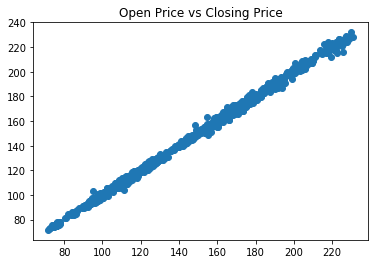

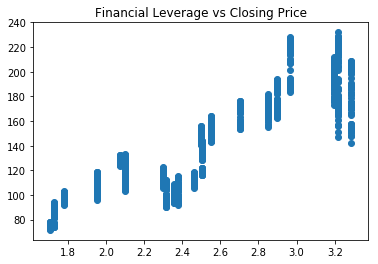

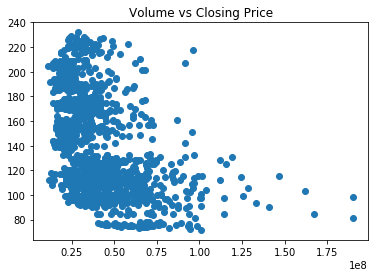

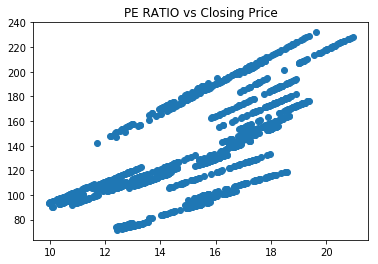

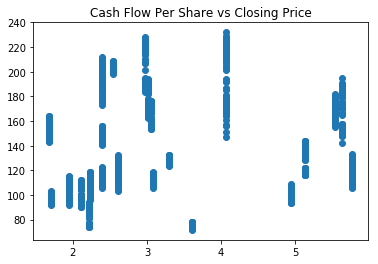

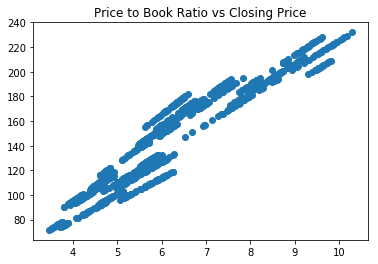

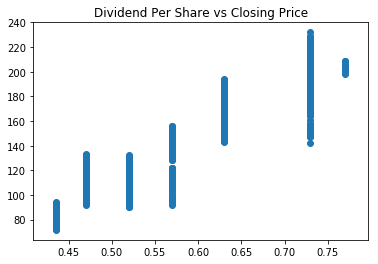

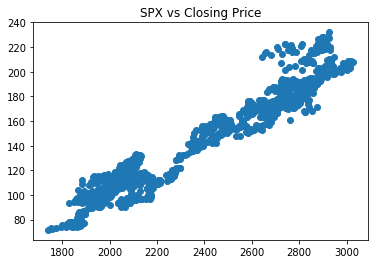

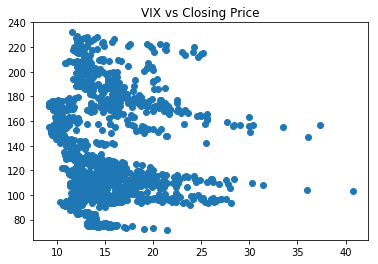

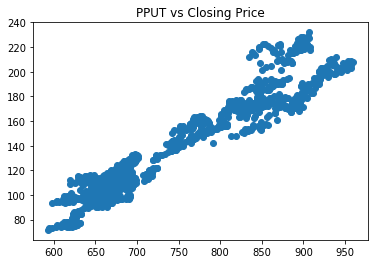

In [12]:
#Plotting closing price against each one of the 10 variables

for x in data.columns:
    plt.scatter(x=data[x], y=y)
    plt.title(f"{x} vs Closing Price")
    plt.show()
    

Initial Assessment based on graphs:
There is a clear linear relationship between open, SPX, PPUT and close price as expected.
There is trending digital form of linear relationship betwen Financial leverage, price to book ratio, dividend per share and Closing price: this is because financial leverage is updated when earning announcement happen every quarter.
It is not clear if there is a relationship based on the graph between volume, VIX and closing price. 


Text(0.5, 1.0, 'Correlation between different fearures')

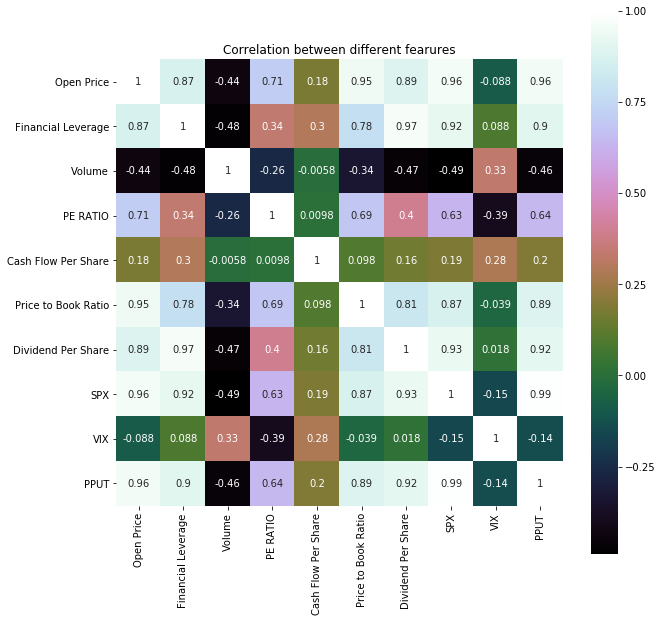

In [13]:
correlation = data.corr()
plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [14]:
#split the data: 80% training, 20% testing
from sklearn.preprocessing import StandardScaler
X = data.values
split=int(len(y)*0.8)
print('split: ', split )
X_train=X[:split, :]
X_test=X[split:, :]
y_train=y[:split]
y_test=y[split:]
print(X_train.shape, y_train.shape)

sc = StandardScaler()   
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

split:  1104
(1104, 10) (1104,)


In [15]:
# Run the PCA algorithm
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principleComponents=pca.fit_transform(X_train)

Variance of each component: [6.08431028e-01 1.39435971e-01 1.12231610e-01 7.24787482e-02
 4.49288110e-02 1.28974582e-02 6.32308720e-03 1.69819715e-03
 1.49311527e-03 8.19744890e-05]

 Total Variance Explained: 100.0


Text(0, 0.5, 'cumulative explained variance')

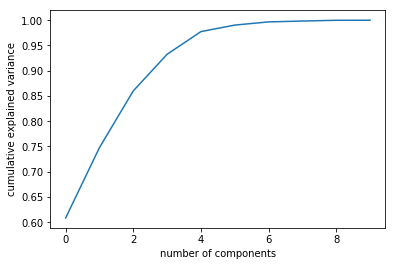

In [16]:
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [17]:
#from dimishing return graph above, 5 components seems to explain 97.75%
pca = PCA(n_components=5)
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test) 
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.60843103 0.13943597 0.11223161 0.07247875 0.04492881]

 Total Variance Explained: 97.75


Static Model: MSE of training data-  14.411631730850353
Static Model: MSE of testing data-  109.9995360774703


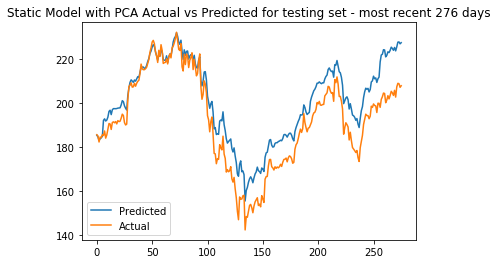

In [18]:
pca = PCA(n_components=5)
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test) 

# Fitting Logistic Regression To the training set 
lr = linear_model.LinearRegression(normalize=True) 
lr.fit(X_train_pc, y_train)

y_hat_train=lr.predict(X_train_pc)
y_hat_test=lr.predict(X_test_pc)

mse_train=mean_squared_error(y_train, y_hat_train)
print('Static Model: MSE of training data- ', mse_train)

mse_test=mean_squared_error(y_test, y_hat_test)
print('Static Model: MSE of testing data- ',mse_test)

plt.plot(y_hat_test, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.title("Static Model with PCA Actual vs Predicted for testing set - most recent 276 days")
plt.legend()
plt.show()

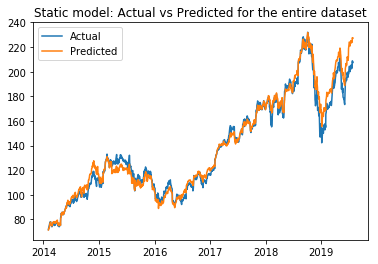

In [19]:
#Static model graphing
y_with_dates=dates.copy()
y_with_dates['y']=y
y_with_dates.set_index('Date', inplace=True)
plt.plot(y_with_dates, label='Actual')


my_comb=pd.DataFrame()
my_pred_comb=list(y_hat_train)
my_pred_comb.extend(y_hat_test)
my_comb=dates.copy()
my_comb['values']=my_pred_comb
my_comb.set_index('Date', inplace=True)
plt.plot(my_comb, label='Predicted')
plt.legend()
plt.title("Static model: Actual vs Predicted for the entire dataset")
plt.show()

Dynamic Model: MSE of testing data-  58.348912381087736


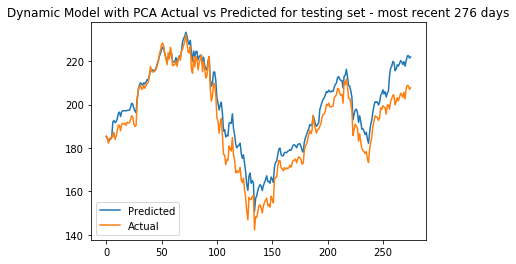

In [20]:
#dynamic model with PCA components of 5

X_train_expand=X_train
y_train_expand=list(y_train)

predictions = list()
for t in range(len(X_test)):
    pca = PCA(n_components=5)
    X_train_pc = pca.fit_transform(X_train_expand)
    X_test_pc = pca.transform(X_test) 


    model = linear_model.LinearRegression(normalize=True) 
    model_fit = model.fit(X_train_pc,y_train_expand)

    yhat = model_fit.predict(X_test_pc[[t]])
    predictions.append(yhat)
    
    X_train_expand=np.vstack((X_train_expand, X_test[t]))
    
    y_train_expand.append(y_test[t+split]) 
    
error = mean_squared_error(y_test, predictions)
print('Dynamic Model: MSE of testing data- ', error)

plt.plot(predictions, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.title("Dynamic Model with PCA Actual vs Predicted for testing set - most recent 276 days")
plt.legend()
plt.show()

In [21]:
#convert list to Dataframe
X_train_df=pd.DataFrame(X_train, index=range(X_train.shape[0]),
                          columns=range(X_train.shape[1]))
X_train_df.columns=data.columns
X_test_df=pd.DataFrame(X_test, index=range(X_test.shape[0]),
                          columns=range(X_test.shape[1]))
X_test_df.columns=data.columns

In [22]:
#try best feature seletion
from sklearn.feature_selection import RFE
best_model=[]

# Fitting Logistic Regression To the training set 
lr = linear_model.LinearRegression(normalize=True) 
for f in range (1,11):
    #Initializing RFE model
    rfe = RFE(lr, f)
    #Transforming data using RFE
    X_rfe = rfe.fit_transform(X_train_df,y_train)  
    #Fitting the data to model
    lr.fit(X_train_df,y_train)
    
    selected_cols=X_train_df.columns[rfe.support_]
    lr.fit(X_train_df[selected_cols], y_train)
    y_pred=lr.predict(X_test_df[selected_cols])
    mse=mean_squared_error(y_test, y_pred)
    print('mse {} features {}'.format(mse, f))
    if f==1:
        best_mse=mse
    elif mse<best_mse:
        best_mse=mse
        best_f=f
        best_model=selected_cols
    
print('linear regression mse with {} features is {}'.format(best_f,best_mse))  
print('The features are {}'.format(best_model))


mse 5.836503886813699 features 1
mse 5.640544544402735 features 2
mse 5.642563842124175 features 3
mse 9.162400931900574 features 4
mse 10.075636187265452 features 5
mse 9.243858007647832 features 6
mse 10.382725646860278 features 7
mse 10.239990465835506 features 8
mse 9.600867068295189 features 9
mse 9.530551801334466 features 10
linear regression mse with 2 features is 5.640544544402735
The features are Index(['Open Price', 'SPX'], dtype='object')


In [23]:
#Try linear regression with statsmodels to see which variables are statistically significant.
import statsmodels.api as sm
X_train_int=sm.add_constant(X_train_df)
model=sm.OLS(y_train, X_train_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Last Price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 5.462e+04
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        23:38:32   Log-Likelihood:                -1862.5
No. Observations:                1104   AIC:                             3747.
Df Residuals:                    1093   BIC:                             3802.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 123.9658      0.040   3134.434      0.000     123.888     124.043
Open Price             24.7585      0.305     81.143      0.000      24.160      25.357
Financial Leverage     -0.5633      0.301     -1.869      0.062      -1.155       0.028
Volume                 -0.0518      0.051     -1.012      0.312      -0.152       0.049
PE RATIO                0.0964      0.135      0.713      0.476      -0.169       0.361
Cash Flow Per Share     0.2838      0.062      4.614      0.000       0.163       0.405
Price to Book Ratio     2.5160      0.199     12.616      0.000       2.125       2.907
Dividend Per Share      0.1803      0.186      0.967      0.334      -0.186       0.546
SPX                     8.0242      1.074      7.473      0.000       5.917      10.131
VIX                     0.1565      0.069      2.262      0.024       0.021       0.292
PPUT                   -5.4762      0.842     -6.502      0.000      -7.129      -3.824
==============================================================================
Omnibus:                      117.003   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              557.276
Skew:                           0.368   Prob(JB):                    9.75e-122
Kurtosis:                       6.402   Cond. No.                         86.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see from the p-values, the variables that are statistically important are Open Price, Cash Flow per Share, Price to book Ratio, SPX, VIX and PPUT. The variables that are not significant are Financial Leverage, Volume, PE Ratio and Dividend per Share.

The result is not entirely surprising. Among the insignficant variables, Financial leverage doesn't move from day to day, hence it would have little impact on daily closing price. Volume is less sensitive to a liquid high volume stock vs an illiquid stock. PE ratio is actually a very important consideration when look at stock valuation, but I suspect because we are analyzing one single stock here, there is very little variation and doesn't change on a daily basis. It is a gradual change. Lastly, Dividend per share also shares the same reason as PE ratio.

In [26]:
#testing static model
def test_model(clf, X_train,y_train, X_test, y_test):

    clf.fit(X_train, y_train)
    y_hat_test=clf.predict(X_test)
    mse=mean_squared_error(y_test, y_hat_test)
    plt.plot(y_hat_test, label='pred')
    plt.plot(y_test.values, label='actual test')
    plt.title(clf)
    plt.legend()
    plt.show()
    return mse

In [27]:
#try different models
def lets_try(X_train,y_train, X_test, y_test):
    results={}

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf, X_train, y_train, X_test, y_test)
         
    clf = linear_model.Ridge(alpha=0.5)
    results["Ridge"]=test_model(clf, X_train, y_train, X_test, y_test)
    
    clf = linear_model.Lasso(alpha=0.5)
    results["Lasso"]=test_model(clf, X_train, y_train, X_test, y_test)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf, X_train, y_train, X_test, y_test)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf, X_train, y_train, X_test, y_test)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf, X_train, y_train, X_test, y_test)
    
   
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Mean Squared Error"] 
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
  
    return results



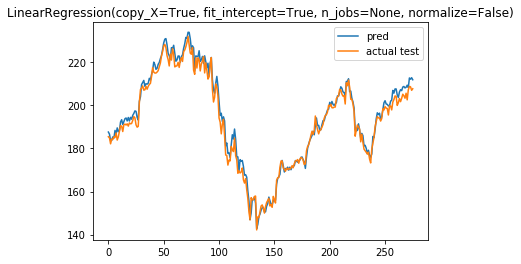

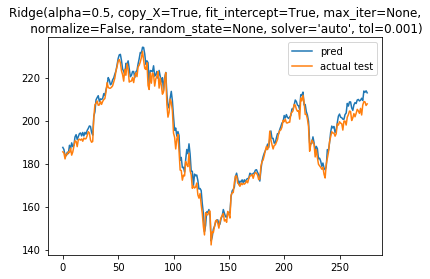

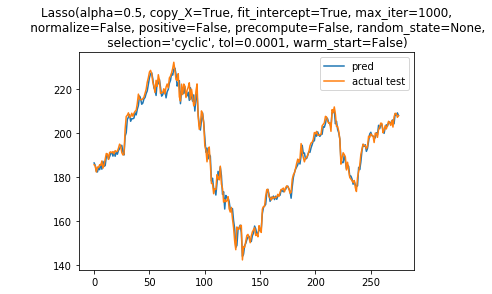

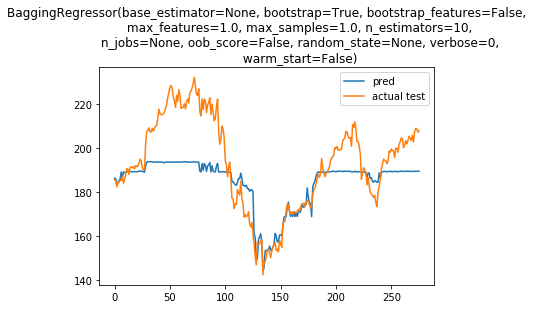

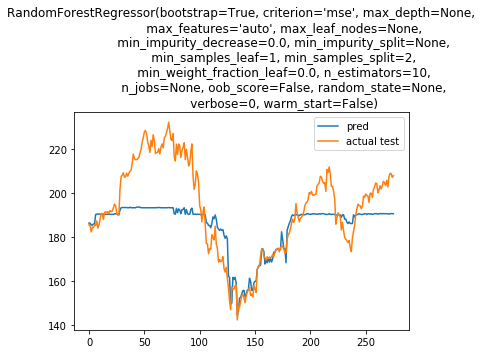

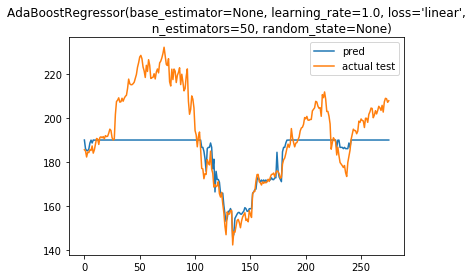

,Mean Squared Error
Linear,9.530552
Ridge,11.240418
Lasso,5.707643
Bagging,228.412496
RandomForest,224.821884
AdaBoost,257.917764


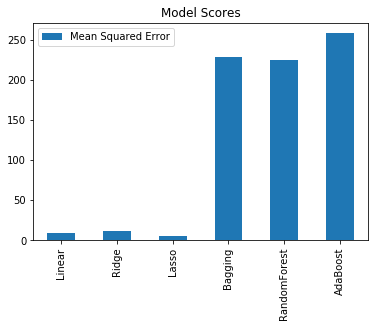

In [25]:
lets_try(X_train_df,y_train, X_test_df, y_test)